In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [85]:
temp = '../DataBase/Data_cwa/2023_1116_竹圍_stemp.csv'
tide = '../DataBase/Data_cwa/2023_1116_竹圍_tide.csv'

In [89]:
dtemp = pd.read_csv(temp, skiprows=9)
dtide = pd.read_csv(tide, skiprows=20)

In [90]:
# dtemp = dtemp[dtemp['yyyymmddhhmi'] >= 202306080800][dtemp['yyyymmddhhmi'] <= 202306232100]
# dtide = dtide[dtide['yyyymmddhh'] >= 2023060808][dtide['yyyymmddhh'] <= 2023062321]

dtemp = dtemp[dtemp['yyyymmddhhmi'] >= 202304141200][dtemp['yyyymmddhhmi'] <= 202305011200]
dtide = dtide[dtide['yyyymmddhh'] >= 2023041412][dtide['yyyymmddhh'] <= 2023050112]


C:\Users\user\AppData\Local\Temp\ipykernel_3320\1569488234.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dtemp = dtemp[dtemp['yyyymmddhhmi'] >= 202304141200][dtemp['yyyymmddhhmi'] <= 202305011200]
C:\Users\user\AppData\Local\Temp\ipykernel_3320\1569488234.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dtide = dtide[dtide['yyyymmddhh'] >= 2023041412][dtide['yyyymmddhh'] <= 2023050112]


In [93]:
temp_datelist = []
for time in dtemp['yyyymmddhhmi']:
    timestr = str(time)
    yyyy = int(timestr[:4])
    mm  = int(timestr[4:6])
    dd = int(timestr[6:8])
    hh = int(timestr[8:10])
    minn  = int(timestr[10:])
    temp_datelist.append(datetime(yyyy,mm,dd,hh,minn))

In [94]:
datelist = []
tidelist = []
for time in dtide['yyyymmddhh']:
    timestr = str(time)
    yyyy = int(timestr[:4])
    mm  = int(timestr[4:6])
    dd = int(timestr[6:8])
    hh = int(timestr[8:10])
    dtide_temp = dtide[dtide['yyyymmddhh']==time]
    for minn_str in [':00', ':06', ':12', ':18', ':24', ':30', ':36', ':42', ':48', ':54']:
        tideheight = dtide_temp[minn_str].values[0]
        minn = int(minn_str.rsplit(':')[-1])
        datelist.append(datetime(yyyy,mm,dd,hh,minn))
        tidelist.append(tideheight)

diff_height = []
for j in range(len(tidelist)):
    if j+1 != len(tidelist):
        h1 = tidelist[j]
        h2 = tidelist[j+1]

        diff = (h2 - h1)/(6*60)
        diff_height.append(diff)
    
        


In [95]:
len(datelist)

4090

C:\Users\user\AppData\Local\Temp\ipykernel_3320\880383900.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_twin.set_yticklabels([-0.4,-0.2,0,0.2,0.4], color='deepskyblue')


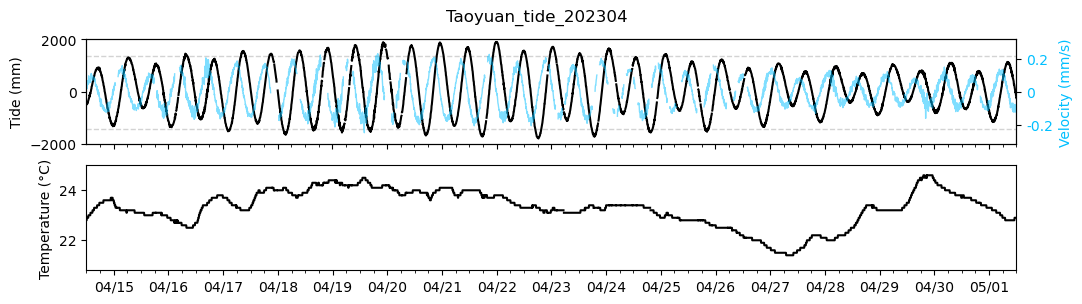

In [109]:
fig, ax = plt.subplots(2,1,figsize=(12,3))


ax[0].hlines(y=1348, xmin=datelist[0], xmax=datelist[-1], color='lightgrey', ls='--', lw=1)
# ax[0].hlines(y=16, xmin=datelist[0], xmax=datelist[-1], color='lightgrey', ls='--')
ax[0].hlines(y=-1424, xmin=datelist[0], xmax=datelist[-1], color='lightgrey', ls='--', lw=1)
ax[0].plot(datelist[1:], np.array(tidelist[1:]), 'k')
ax[0].set_xlim(datelist[0], temp_datelist[-1])
ax[0].set_ylim(-2000,2000)
ax[0].set_ylabel('Tide (mm)', fontsize=10)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax[0].xaxis.set_minor_locator(mdates.HourLocator(interval=6))   #to get a tick every 15 minutes
ax[0].set_xticklabels([])

ax_twin = ax[0].twinx()
from scipy.signal import savgol_filter
# ax_twin.plot(datelist[1:], diff_height, 'b', lw=0.5)
ax_twin.plot(datelist[1:],savgol_filter(diff_height, window_length=10, polyorder=2, mode='nearest'),'deepskyblue', alpha=0.5, lw=1)
ax_twin.set_xlim(datelist[1], temp_datelist[-1])
ax_twin.set_ylabel('Velocity (mm/s)', c='deepskyblue', fontsize=10)
ax_twin.set_ylim(-0.4,0.4)
ax_twin.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax_twin.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax_twin.xaxis.set_minor_locator(mdates.HourLocator(interval=6))   #to get a tick every 15 minutes
ax_twin.set_xticklabels([])
ax_twin.set_yticklabels([-0.4,-0.2,0,0.2,0.4], color='deepskyblue')

ax[1].plot(temp_datelist, dtemp['T'], 'k')
ax[1].set_xlim(temp_datelist[0], temp_datelist[-1])#datetime(2023, 6, 23, 21, 54))
ax[1].set_ylim(int(min(dtemp['T']))-0.2, int(max(dtemp['T']))+1)
ax[1].set_ylabel('Temperature (°C)', fontsize=10)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))     #optional formatting 
ax[1].xaxis.set_minor_locator(mdates.HourLocator(interval=6))   #to get a tick every 15 minutes

plt.suptitle('Taoyuan_tide_202304', fontsize=12)
plt.savefig('../Results/observation_cwa/Taoyuan_tide_202304.png', dpi=150)